In [2]:
# 디퓨저를 이용해서 텍스트로 이미지를 생성하는 코드

In [6]:
from diffusers import DiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [7]:
# pipeline 함수를 사용해서, Stable Diffusion 모델 로드

In [8]:
pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
# GPU 사용 가능하면 GPU로 사용하고, 그렇지 않으면 CPU 사용
pipe.to("cuda" if torch.cuda.is_available() else "cpu")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [10]:
# 텍스트 프롬프트로 이미지 생성
prompt = 'A fantasy landscape with castles and dragons, highly detailed, digital art'

In [11]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
# 생성된 이미지를 파일로 저장
image.save('my_image.jpg')

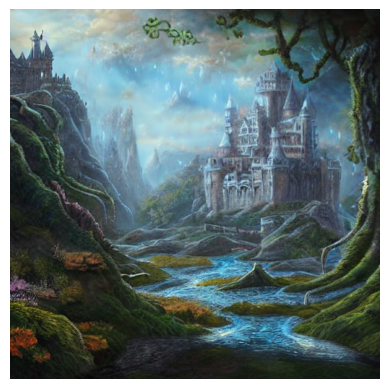

In [15]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

In [1]:
# 2개로 분류하는 모델을 사용해보자
# 긍정문 / 부정문

In [ ]:
# 다음은 주요 AutoModel 클래스들의 목록입니다:

# AutoModel: 기본 모델을 로드합니다.
# AutoModelForPreTraining: 사전 학습(Pre-training)을 위한 모델을 로드합니다.
# AutoModelForCausalLM: Causal Language Modeling을 위한 모델을 로드합니다.
# AutoModelForMaskedLM: Masked Language Modeling을 위한 모델을 로드합니다.
# AutoModelForSequenceClassification: 시퀀스 분류를 위한 모델을 로드합니다.
# AutoModelForTokenClassification: 토큰 분류를 위한 모델을 로드합니다.
# AutoModelForQuestionAnswering: 질의응답을 위한 모델을 로드합니다.
# AutoModelForSeq2SeqLM: 시퀀스-투-시퀀스(Sequence-to-Sequence) 작업을 위한 모델을 로드합니다.
# AutoModelForImageClassification: 이미지 분류를 위한 모델을 로드합니다.
# AutoModelForImageSegmentation: 이미지 분할을 위한 모델을 로드합니다.
# AutoModelForObjectDetection: 객체 탐지를 위한 모델을 로드합니다.
# AutoModelForVision2Seq: 비전-투-시퀀스 작업을 위한 모델을 로드합니다.
# AutoModelForAudioClassification: 오디오 분류를 위한 모델을 로드합니다.
# AutoModelForCTC: Connectionist Temporal Classification을 위한 모델을 로드합니다.
# AutoModelForAudioFrameClassification: 오디오 프레임 분류를 위한 모델을 로드합니다.
# AutoModelForAudioXVector: 오디오 X-벡터를 위한 모델을 로드합니다.
# AutoModelForSpeechSeq2Seq: 음성 시퀀스-투-시퀀스 작업을 위한 모델을 로드합니다.

In [16]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [17]:
# 감정분석을 위한 모델과 토크나이저를 가져온다. pipeline 방식이 아니다.
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [42]:
texts = ["I love this movie! It was fantastic!", "This is the worst experience I have ever had.", '''In today's fast-paced and highly interconnected world, technology has revolutionized nearly every aspect of human life, from the way we communicate and work to how we access information, entertain ourselves, and even manage our daily routines, with smartphones, artificial intelligence, cloud computing, and the internet playing crucial roles in shaping modern society by enabling instant global communication, facilitating remote work, streamlining complex processes, and providing an unprecedented level of convenience that previous generations could hardly have imagined; however, while these advancements have brought countless benefits, such as increased efficiency, improved accessibility to education and healthcare, and the ability to stay connected with friends and family regardless of physical distance, they have also introduced new challenges and concerns, including privacy risks, cybersecurity threats, social isolation, and the potential for misinformation to spread rapidly across digital platforms, making it essential for individuals, businesses, and governments to strike a delicate balance between embracing innovation and implementing safeguards to protect personal data, ensure online security, and promote ethical technology use, all while fostering a digital landscape that encourages creativity, inclusivity, and meaningful human interactions rather than dependency on screens and algorithms to dictate every aspect of daily life.''']

In [19]:
text = "I love this movie! It was fantastic!"

In [20]:
# 토크나이저 이용해서 문장을 토큰으로 만든다.
inputs = tokenizer(text, return_tensors='pt')

In [21]:
inputs

{'input_ids': tensor([[  101,  1045,  2293,  2023,  3185,   999,  2009,  2001, 10392,   999,
           102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [22]:
# 모델 실행
with torch.no_grad() :
  logits = model(**inputs).logits

In [23]:
# 모델을 통해 예측을 수행하면, 결과는 로짓이 나온다.
logits

SequenceClassifierOutput(loss=None, logits=tensor([[-4.3242,  4.6727]]), hidden_states=None, attentions=None)

In [24]:
# 로짓을 클래스로 매핑해야 한다.

In [28]:
# 소프트맥스(Softmax)를 적용해서 확률을 계산한다. : 0~1 사이의 값으로 만들어야 한다.
probs = torch.nn.functional.softmax(logits, dim=-1)

In [29]:
probs

tensor([[1.2378e-04, 9.9988e-01]])

In [32]:
# 가장 높은 확률을 가진 클래스 값을 가져온다.
predicted_classes = torch.argmax(probs, dim= -1).tolist()

In [33]:
predicted_classes

[1]

In [35]:
# 숫자로 예측된 값을, 사람이 확인할 수 있는 코드
from transformers import AutoConfig
config = AutoConfig.from_pretrained(model_name)
print( config.id2label)

{0: 'NEGATIVE', 1: 'POSITIVE'}


In [37]:
config.id2label[predicted_classes[0]]

'POSITIVE'

In [43]:
# 두문장 이상의 데이터
texts

['I love this movie! It was fantastic!',
 'This is the worst experience I have ever had.',
 "In today's fast-paced and highly interconnected world, technology has revolutionized nearly every aspect of human life, from the way we communicate and work to how we access information, entertain ourselves, and even manage our daily routines, with smartphones, artificial intelligence, cloud computing, and the internet playing crucial roles in shaping modern society by enabling instant global communication, facilitating remote work, streamlining complex processes, and providing an unprecedented level of convenience that previous generations could hardly have imagined; however, while these advancements have brought countless benefits, such as increased efficiency, improved accessibility to education and healthcare, and the ability to stay connected with friends and family regardless of physical distance, they have also introduced new challenges and concerns, including privacy risks, cybersecurit

In [45]:
# 문장이 여러개일때는, 가장 긴 문장에 맞춰서 짧은 문장들의 토큰을 0으로 채워야 하고
# 토큰이 이 모델의 최대 토큰갯수보다 길면, 나머지 토큰은 잘라내도록 처리한다.

inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=128)

In [46]:
with torch.no_grad():
  logits = model(**inputs).logits

In [47]:
logits

tensor([[-4.3242,  4.6727],
        [ 4.6273, -3.7186],
        [-3.9157,  4.1164]])

In [48]:
probs = torch.nn.functional.softmax(logits, dim=-1)

In [49]:
probs

tensor([[1.2378e-04, 9.9988e-01],
        [9.9976e-01, 2.3730e-04],
        [3.2476e-04, 9.9968e-01]])

In [50]:
predicted_classes = torch.argmax(probs, dim=-1).tolist()

In [51]:
predicted_classes

[1, 0, 1]

In [53]:
for id in predicted_classes :
  print( config.id2label[id] )

POSITIVE
NEGATIVE
POSITIVE


In [1]:
## 모델 가져와서 학습

In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig

In [3]:
import torch

In [4]:
# Fine-Tuning 한다. : 이미 잘 학습된 남이 만든 모델 가져다가, 나이 데이터로 내문제를 해결하는 인공지능 개발.

In [5]:
# 영화 리뷰에 대한 긍정/부정 맞추는 인공지능 개발

In [7]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

In [8]:
model = AutoModelForSequenceClassification.from_pretrained(model_name)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [9]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [10]:
config = AutoConfig.from_pretrained(model_name)

In [12]:
config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [13]:
# 학습 시킬 데이터 준비 : 허깅페이스의 datasets 에서 imdb 데이터 가져온다.

In [14]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 wh

In [15]:
from datasets import load_dataset

In [17]:
dataset = load_dataset("imdb")

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [18]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [20]:
# 토크나이징 하기 위한 함수
def tokenize_function(data) :
  return tokenizer(data['text'], padding=True, truncation=True, max_length=128)

In [21]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [22]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50000
    })
})

In [23]:
from transformers import Trainer, TrainingArguments

In [ ]:
# 1. TrainingArguments 설정

In [24]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# 2. Trainer 설정

In [25]:
trainer = Trainer(
    model= model,
    args= training_args,
    train_dataset= tokenized_datasets['train'],
    eval_dataset= tokenized_datasets['test'],
    tokenizer= tokenizer
)

<ipython-input-25-b8edd125d158>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [26]:
# 학습
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: blockenters (blockenters-mycompany) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,0.316400,0.312075


TrainOutput(global_step=3125, training_loss=0.3611779833984375, metrics={'train_runtime': 540.6099, 'train_samples_per_second': 46.244, 'train_steps_per_second': 5.781, 'total_flos': 827921241600000.0, 'train_loss': 0.3611779833984375, 'epoch': 1.0})

In [27]:
# 평가 실행

trainer.evaluate()

{'eval_loss': 0.31207484006881714,
 'eval_runtime': 88.5223,
 'eval_samples_per_second': 282.415,
 'eval_steps_per_second': 35.302,
 'epoch': 1.0}

In [28]:
import torch
# GPU 사용 가능 여부 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 모델에 적용
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
# 새로운 문장으로 예측!

In [29]:
new_texts = ["I love this movie! It was fantastic!", "This was the worst experience ever. I will never come back."]

In [35]:
# 문장 토큰화
inputs = tokenizer(new_texts, return_tensors='pt', padding=True, truncation=True, max_length=128).to(device)

In [39]:
# 예측 수행
with torch.no_grad():
  logits = model(**inputs).logits

In [40]:
logits

tensor([[-3.2686,  3.6221],
        [ 3.0628, -2.6363]], device='cuda:0')

In [42]:
# Softmax 를 적용해서 확률로 계산
probs = torch.nn.functional.softmax(logits, dim=-1)

In [43]:
probs

tensor([[0.0010, 0.9990],
        [0.9967, 0.0033]], device='cuda:0')

In [45]:
predicted_classes = torch.argmax(probs, dim=-1)

In [46]:
predicted_classes

tensor([1, 0], device='cuda:0')

In [51]:
for id in predicted_classes.tolist() :
  print( config.id2label[id] )

POSITIVE
NEGATIVE


In [ ]:
# 내가 학습완료한 모델을 서비스로 배포할거다.
# 모델을 저장한다.

In [52]:
trainer.save_model(training_args.output_dir)

In [ ]:
# 모델을 허깅페이스의 모델 레파지토리에 업로드 할거다!
# 코랩이, 여러분의 허깅페이스에 업로드할수 있도록 인증 토큰이 필요합니다.
# 먼저, 허깅페이스에서 토큰을 생성한다.

In [53]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
The token `model-upload` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate w

In [54]:
! git config --global credential.helper store

In [56]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write

In [57]:
# 파이썬 코드로, 허깅페이스 로그인
from huggingface_hub import notebook_login
notebook_login()


In [ ]:
# 인증 토큰 셋팅끝나면, 모델 업로드

In [59]:
# 1. 현재 메모리에 변수로 모델이 존재하는경우
model.push_to_hub("blockenters/distilbert-base-uncased-imdb")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/blockenters/distilbert-base-uncased-imdb/commit/73bf60c10806caceddd8356b578a13873f164f57', commit_message='Upload DistilBertForSequenceClassification', commit_description='', oid='73bf60c10806caceddd8356b578a13873f164f57', pr_url=None, repo_url=RepoUrl('https://huggingface.co/blockenters/distilbert-base-uncased-imdb', endpoint='https://huggingface.co', repo_type='model', repo_id='blockenters/distilbert-base-uncased-imdb'), pr_revision=None, pr_num=None)

In [60]:
tokenizer.push_to_hub("blockenters/distilbert-base-uncased-imdb")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/blockenters/distilbert-base-uncased-imdb/commit/e79f5edc311d6ad9d0f66a00ed05c697f430abfc', commit_message='Upload tokenizer', commit_description='', oid='e79f5edc311d6ad9d0f66a00ed05c697f430abfc', pr_url=None, repo_url=RepoUrl('https://huggingface.co/blockenters/distilbert-base-uncased-imdb', endpoint='https://huggingface.co', repo_type='model', repo_id='blockenters/distilbert-base-uncased-imdb'), pr_revision=None, pr_num=None)

In [61]:
config.push_to_hub("blockenters/distilbert-base-uncased-imdb")

CommitInfo(commit_url='https://huggingface.co/blockenters/distilbert-base-uncased-imdb/commit/8a062dbea3aaa14164cd14e5de022115340cee29', commit_message='Upload config', commit_description='', oid='8a062dbea3aaa14164cd14e5de022115340cee29', pr_url=None, repo_url=RepoUrl('https://huggingface.co/blockenters/distilbert-base-uncased-imdb', endpoint='https://huggingface.co', repo_type='model', repo_id='blockenters/distilbert-base-uncased-imdb'), pr_revision=None, pr_num=None)

In [62]:
from huggingface_hub import HfApi

In [64]:
my_model_name = "blockenters/distilbert-base-uncased-imdb2"

In [66]:
# 레파지토리를 파이썬 코드로 생성하는 방법
api = HfApi()
repo_id = api.create_repo(repo_id=my_model_name, exist_ok=True, private=True)

In [67]:
repo_id

RepoUrl('https://huggingface.co/blockenters/distilbert-base-uncased-imdb2', endpoint='https://huggingface.co', repo_type='model', repo_id='blockenters/distilbert-base-uncased-imdb2')

In [68]:
api.upload_folder(
    folder_path='./results/checkpoint-3125',
    repo_id= my_model_name,
    repo_type='model',
    ignore_patterns=['.gitattributes', '.git', '.gitignore', 'README.md']
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/536M [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/blockenters/distilbert-base-uncased-imdb2/commit/f7a6fb7d79263560ae94476ff248febbcfc9914f', commit_message='Upload folder using huggingface_hub', commit_description='', oid='f7a6fb7d79263560ae94476ff248febbcfc9914f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/blockenters/distilbert-base-uncased-imdb2', endpoint='https://huggingface.co', repo_type='model', repo_id='blockenters/distilbert-base-uncased-imdb2'), pr_revision=None, pr_num=None)